In [1]:
'''This code uses an ANN to predict outcomes of AFL matches in 2018 based on player data from 2012-2017.'''
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime

In [2]:
#afl = pd.read_csv('C:/path/to/your/csv/file.csv')

In [3]:
afl = pd.read_csv('C:/Users/the_n/OneDrive/Documents/Coding/afl-predictor/stats.csv')

In [4]:
afl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63712 entries, 0 to 63711
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    63712 non-null  object 
 1   Player                  63712 non-null  object 
 2   D.O.B                   63712 non-null  object 
 3   Height                  63712 non-null  int64  
 4   Weight                  63712 non-null  int64  
 5   Position                63712 non-null  object 
 6   Season                  63712 non-null  int64  
 7   Round                   63712 non-null  object 
 8   Date                    63624 non-null  object 
 9   Score                   63624 non-null  float64
 10  Margin                  63624 non-null  float64
 11  WinLoss                 63624 non-null  object 
 12  Opposition              63624 non-null  object 
 13  Venue                   63624 non-null  object 
 14  Disposals               63712 non-null

In [5]:
afl = afl.dropna(axis=0)
afl = afl[afl['WinLoss'] != 'D']
afl['D.O.B'] = pd.to_datetime(afl['D.O.B'])
afl['Date'] = pd.to_datetime(afl['Date'])
age_in_days = (afl['Date']-afl['D.O.B'])
age_in_years = age_in_days.dt.days/365.2425
afl['Age'] = age_in_years

In [6]:
import random
grouped_data = afl.groupby(['Team','Season','Round','WinLoss','Opposition','Venue'])['Player'].apply(list).reset_index()
players = grouped_data['Player'].to_numpy()

for item in players:
    random.shuffle(item)
    
grouped_data['Player'] = players
grouped_data = grouped_data.to_numpy()

In [7]:
grouped_data[0]

array(['Adelaide', 2012, 'PF', 'L', 'Hawthorn', 'M.C.G.',
       list(['Thompson, Scott', 'Smith, Brodie', 'Porplyzia, Jason', 'Sloane, Rory', 'Reilly, Brent', 'Rutten, Ben', 'Douglas, Richard', 'van Berlo, Nathan', 'Tippett, Kurt', 'Callinan, Ian', 'Henderson, Ricky', 'Thompson, Luke', 'Johncock, Graham', 'Doughty, Michael', 'Jacobs, Sam', 'Otten, Andy', 'Wright, Matthew', 'Walker, Taylor', 'Mackay, David', 'Petrenko, Jared', 'Dangerfield, Patrick', 'Vince, Bernie'])],
      dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct1 = ColumnTransformer([('encoder',OneHotEncoder(),[3,4,5])], remainder='passthrough',sparse_threshold=0)
grouped_data = ct1.fit_transform(grouped_data)

In [9]:
grouped_data[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 'Adelaide', 2012, 'PF',
       list(['Thompson, Scott', 'Smith, Brodie', 'Porplyzia, Jason', 'Sloane, Rory', 'Reilly, Brent', 'Rutten, Ben', 'Douglas, Richard', 'van Berlo, Nathan', 'Tippett, Kurt', 'Callinan, Ian', 'Henderson, Ricky', 'Thompson, Luke', 'Johncock, Graham', 'Doughty, Michael', 'Jacobs, Sam', 'Otten, Andy', 'Wright, Matthew', 'Walker, Taylor', 'Mackay, David', 'Petrenko, Jared', 'Dangerfield, Patrick', 'Vince, Bernie'])],
      dtype=object)

In [10]:
training = [x for x in grouped_data if x[43]<2018]
test = [x for x in grouped_data if x[43]==2018]

In [11]:
y_train = np.array([x[0] for x in training])
y_train = y_train.reshape(-1,1)
y_test = np.array([x[0] for x in test])
y_test = y_test.reshape(-1,1)

In [12]:
print(y_train)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [13]:
# player_stats is each players' average stats between 2012 and 2017.
player_stats = afl[afl['Season'] < 2018].groupby('Player',sort=False).mean()
player_stats = player_stats.reset_index()
player_stats = player_stats.drop(['Season','Score','Margin'],axis=1)
player_stats = player_stats.sample(frac=1).reset_index(drop=True)
player_stats = player_stats.to_numpy()

# Player average stats for 2018
player_stats_2018 = afl[afl['Season'] == 2018].groupby('Player',sort=False).mean()
player_stats_2018 = player_stats_2018.reset_index()
player_stats_2018 = player_stats_2018.drop(['Season','Score','Margin'],axis=1)
player_stats_2018 = player_stats_2018.sample(frac=1).reset_index(drop=True)
player_stats_2018 = player_stats_2018.to_numpy()

In [14]:
player_stats[0]

array(['Goodes, Brett', 183.0, 89.0, 17.045454545454547,
       10.772727272727273, 4.045454545454546, 6.2727272727272725,
       0.18181818181818182, 0.09090909090909091, 0.13636363636363635,
       2.6363636363636362, 2.8181818181818183, 2.272727272727273,
       1.3636363636363635, 2.772727272727273, 0.9545454545454546, 1.0,
       0.09090909090909091, 6.2727272727272725, 9.909090909090908,
       0.22727272727272727, 0.0, 1.8636363636363635, 0.5,
       0.18181818181818182, 78.5, 29.979335024613157], dtype=object)

In [15]:
len(player_stats)

1145

In [16]:
# Include opposition and venue in features
opp_teams_train = np.array([x[2:42] for x in training])
opp_teams_test = np.array([x[2:42] for x in test])

In [17]:
opp_teams_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0], dtype=object)

In [18]:
X_train = [0]*len(training)
for i in range(0,len(training)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats)):
        if player_stats[j][0] in training[i][-1]:
            player_list.append(player_stats[j][1:])
    X_train[i] = player_list
    
X_train = [np.concatenate(x) for x in X_train]

In [19]:
print(len(X_train[0]))
X_train[0]

572


array([202.0, 106.0, 11.726315789473684, 7.063157894736842,
       4.073684210526316, 4.663157894736842, 1.8526315789473684,
       1.0842105263157895, 12.294736842105262, 2.2421052631578946,
       0.23157894736842105, 1.7894736842105263, 1.3368421052631578,
       2.1473684210526316, 1.2526315789473683, 1.263157894736842,
       0.08421052631578947, 7.3052631578947365, 4.621052631578947,
       1.8210526315789475, 2.0526315789473686, 2.0526315789473686,
       0.010526315789473684, 0.43157894736842106, 79.46315789473684,
       27.451293174722057, 181.0, 79.0, 20.346774193548388,
       12.725806451612904, 3.4919354838709675, 7.620967741935484,
       0.6693548387096774, 0.5645161290322581, 0.06451612903225806,
       3.870967741935484, 1.314516129032258, 4.306451612903226,
       3.661290322580645, 2.4274193548387095, 1.0, 0.9435483870967742,
       0.03225806451612903, 8.435483870967742, 11.85483870967742,
       0.22580645161290322, 0.5161290322580645, 1.3951612903225807,
       0

In [20]:
'''modified: player_stats_2018 -> player_stats to test performance'''
X_test = [0]*len(test)
for i in range(0,len(test)):
    player_list = []
    j = 0
    for j in range(0,len(player_stats_2018)):
        if player_stats_2018[j][0] in test[i][-1]:
            player_list.append(player_stats_2018[j][1:])
    X_test[i] = player_list
    
X_test = [np.concatenate(x) for x in X_test]

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [22]:
len(X_test)

408

In [23]:
scaled_X_train = np.hstack((scaled_X_train, opp_teams_train))
scaled_X_test = np.hstack((scaled_X_test, opp_teams_test))

In [24]:
scaled_X_train = np.asarray(scaled_X_train).astype(np.float32)
scaled_X_test = np.asarray(scaled_X_test).astype(np.float32)

In [25]:
print(scaled_X_train[0])

[ 2.01844740e+00  2.20202398e+00 -1.02666068e+00 -8.59741628e-01
  1.59570828e-01 -1.01767027e+00  2.18482089e+00  1.81413805e+00
  2.59483910e+00 -7.08010912e-01 -1.32524836e+00 -6.38437629e-01
 -2.42155850e-01 -8.17581788e-02  1.21390557e+00  1.96432674e+00
 -1.78979442e-01  4.14096832e-01 -1.64545846e+00  2.78368378e+00
  2.37161303e+00  1.13839634e-01 -1.13639760e+00  2.00509056e-02
 -1.74249142e-01  6.54445171e-01 -1.00790203e+00 -1.22623503e+00
  9.64351952e-01  1.40856278e+00 -4.91763204e-01  2.62705922e-01
 -4.28315289e-02  1.83535621e-01 -3.42217892e-01  7.75135815e-01
  3.64111513e-02  1.99175346e+00  1.37013912e+00  5.44578254e-01
  3.92572224e-01  3.90220582e-01 -5.09226620e-01  9.67815042e-01
  7.51691639e-01 -6.26882374e-01 -2.27324918e-01 -4.57072705e-01
  6.72446847e-01  1.52015984e+00 -1.38757844e-02  8.39664698e-01
 -1.44709766e+00 -3.86754900e-01 -1.60151571e-01  1.11571677e-01
 -7.12938607e-02 -4.23494756e-01  7.96422064e-01  5.72392702e-01
 -3.50167215e-01 -5.86584

In [26]:
# Build the ANN
ann = tf.keras.models.Sequential()
# First layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Second layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
steps = []
accs = []
test_accs = []

for i in range(0, 50):
    ann.fit(scaled_X_train, y_train, epochs = 1)
    [loss, accuracy] = ann.evaluate(scaled_X_train, y_train)
    [loss_t, accuracy_t] = ann.evaluate(scaled_X_test, y_test)
    accs.append(accuracy), steps.append(i), test_accs.append(accuracy_t)

 1/78 [..............................] - ETA: 0s - loss: 0.3984 - accuracy: 0.7812WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0010s). Check your callbacks.


78/78 [==============================] - 0s 436us/step - loss: 0.2830 - accuracy: 0.8812


13/13 [==============================] - 0s 539us/step - loss: 1.3180 - accuracy: 0.6078


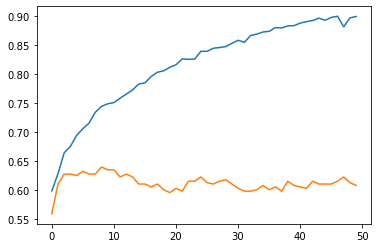

In [29]:
import matplotlib.pyplot as plt
plt.plot(steps, accs)
plt.plot(steps, test_accs)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

NameError: name 'y_pred1' is not defined